In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cleaned_data.csv')
data.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

# Convert categorical columns to categorical datatype

In [4]:
categorical_columns = ['Marital status','Application mode','Application order','Daytime/evening attendance\t',
                      'Previous qualification','Nacionality','Debtor','Tuition fees up to date', 'Gender', 'Scholarship holder',
                      'International','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
                       'Curricular units 1st sem (approved)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                       'Curricular units 2nd sem (approved)','Curricular units 2nd sem (without evaluations)',"Mother's occupation","Father's occupation",'Displaced',
                       'Educational special needs','Target']

for  cat in categorical_columns:
    data[cat] = pd.Categorical(data[cat])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   int64   
 4   Daytime/evening attendance	                     4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   int64   
 9   Father's qualification        

# Univariate Analysis
1. numerical variables
2. categorical variables

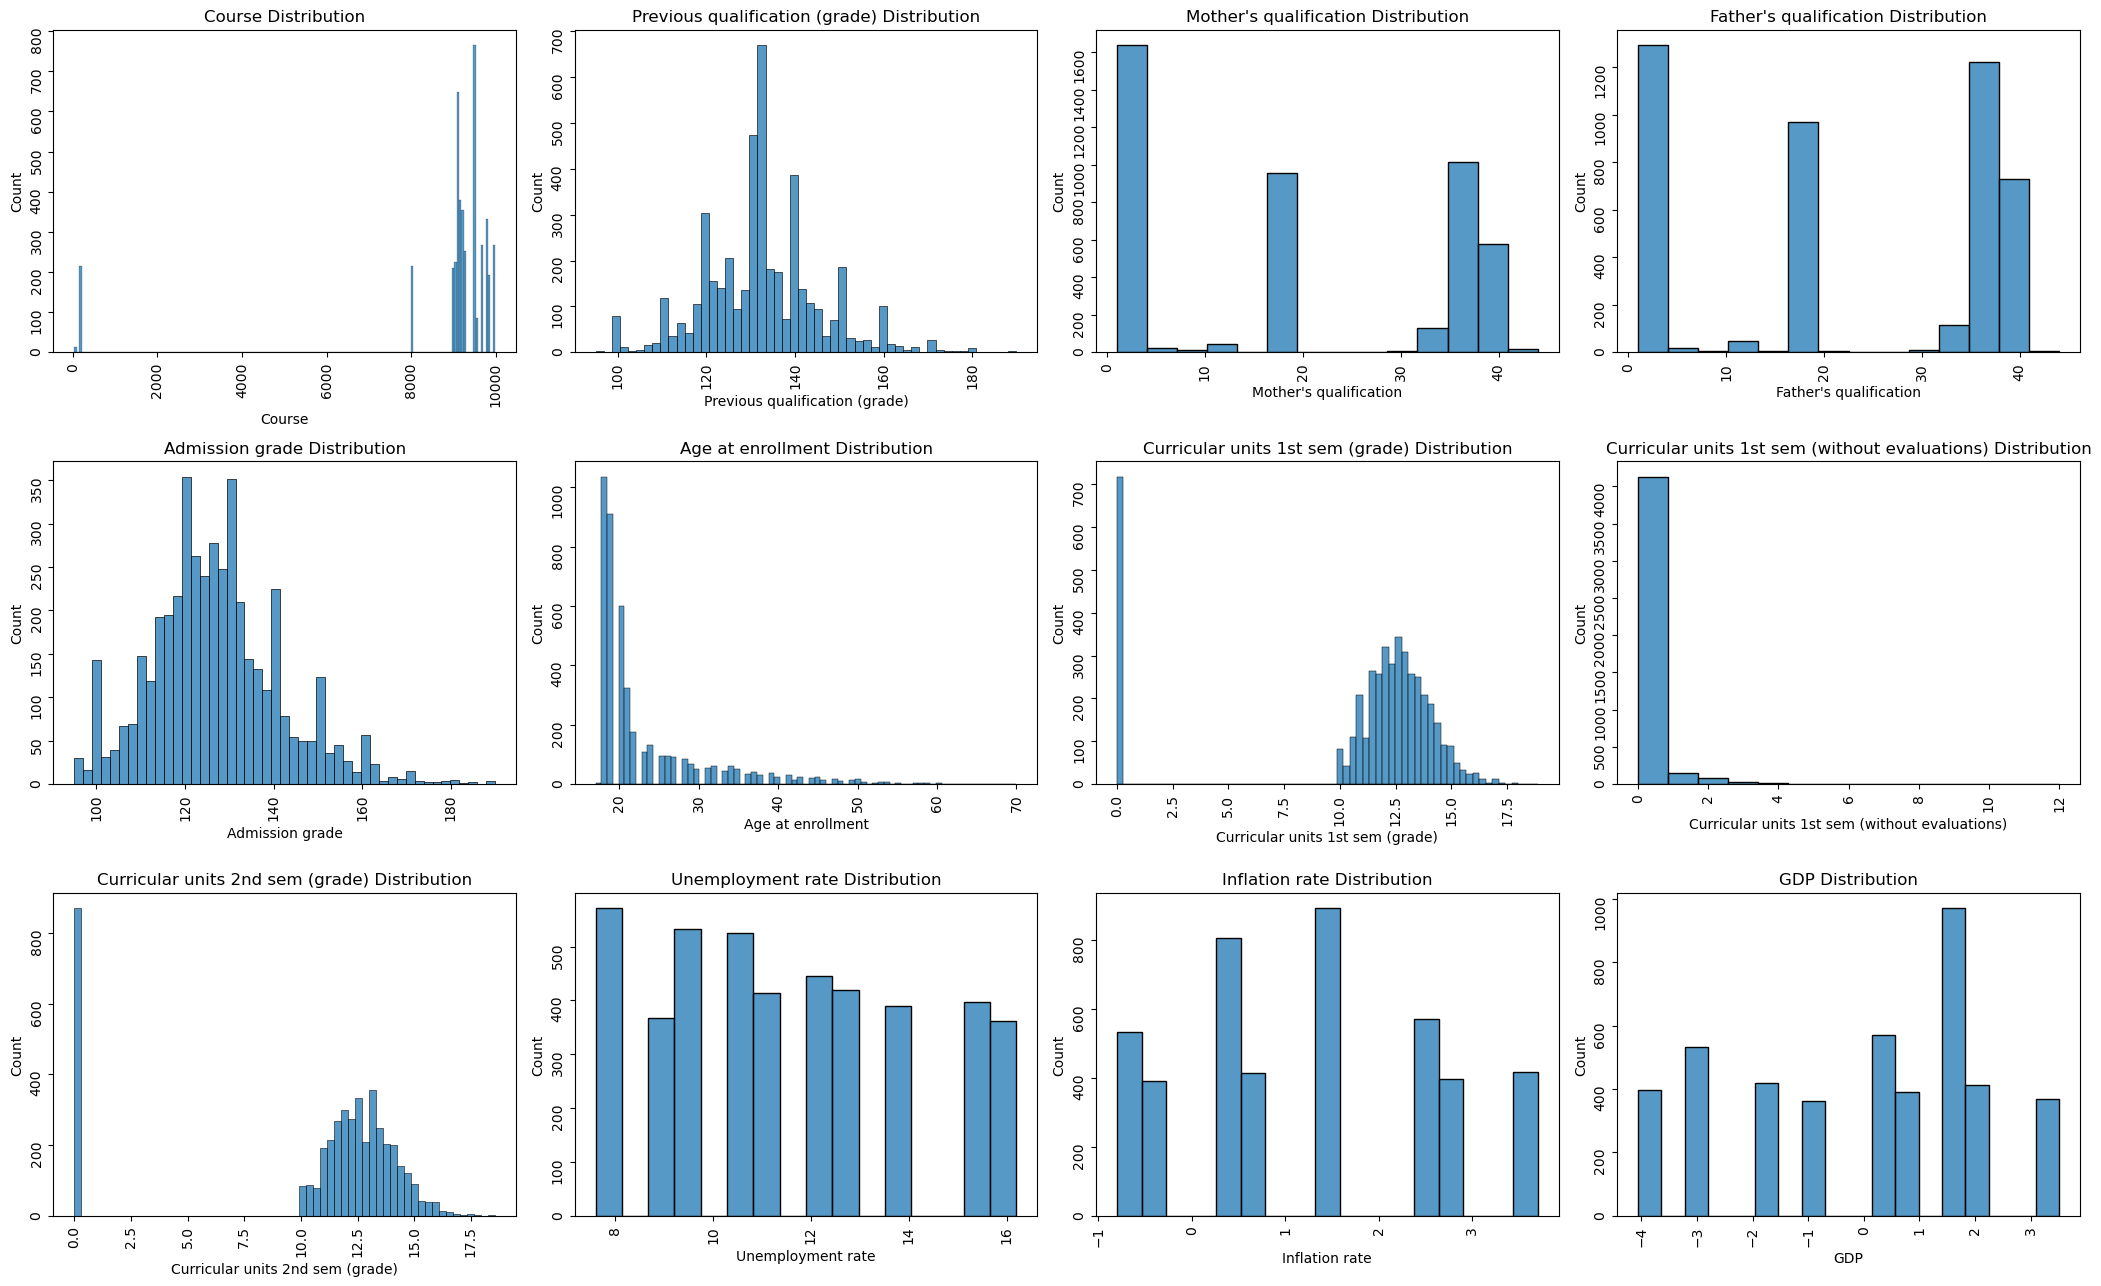

In [6]:
numeric_data = data.select_dtypes(include=['int','float'])
column_name = numeric_data.columns
n_rows = (len(column_name)+3)//3
fig,ax=plt.subplots(n_rows,4,figsize=(21,21))
ax=ax.flatten()
for i , colname in enumerate(column_name):
    sns.histplot(numeric_data,x=colname,ax=ax[i])
    ax[i].set_title(f'{colname} Distribution')
    ax[i].tick_params(rotation=90)

# Hide any empty subplots
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

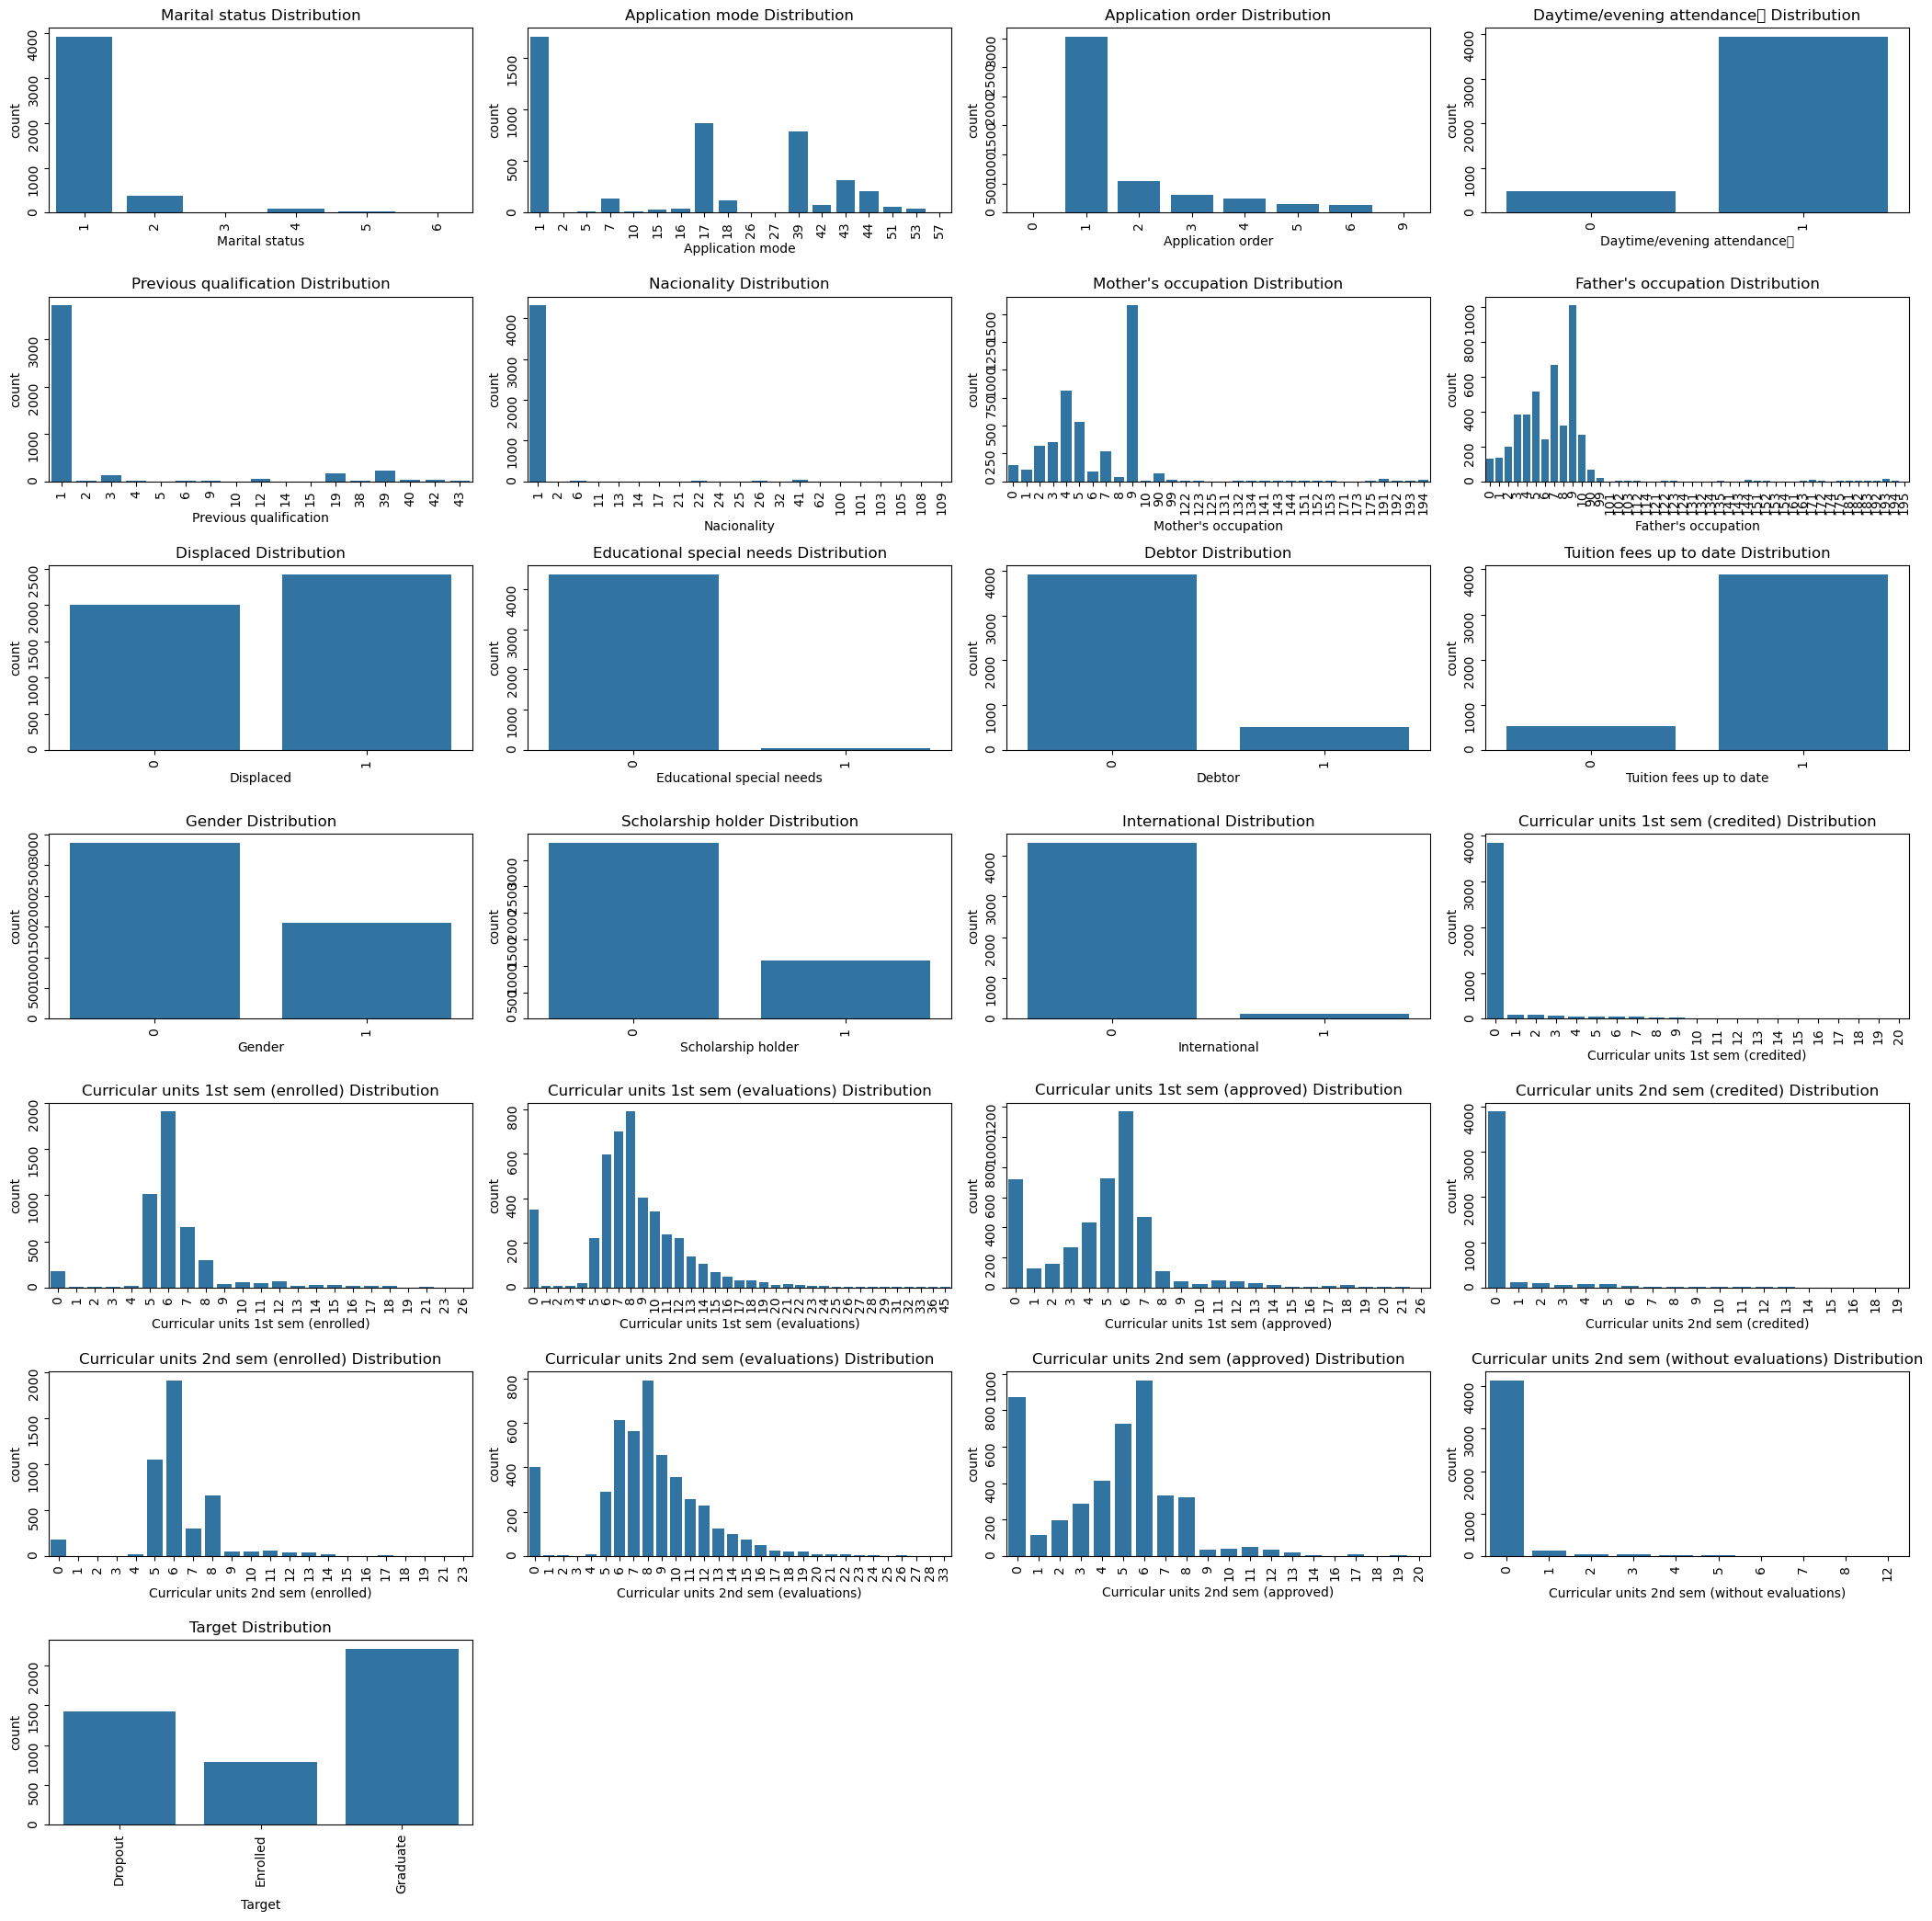

In [7]:
categorical_data = data.select_dtypes(['category'])
categorical_column  = categorical_data.columns
n_rows = (len(categorical_columns) + 3) // 4  # 4 columns per row
fig, ax = plt.subplots(n_rows, 4, figsize=(21, 21))
# Flatten the axes array if it's multi-dimensional
ax = ax.flatten()
for i,colname in enumerate(categorical_column): 
    sns.countplot(categorical_data,x=colname,ax=ax[i])
    ax[i].set_title(f'{colname} Distribution')
    ax[i].tick_params(rotation=90)

# Hide any empty subplots
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

# Compute and Visualize Descriptive statistics

In [8]:
categorical_data.describe()

Marital status  Application mode  Application order  \
count             4424              4424               4424   
unique               6                18                  8   
top                  1                 1                  1   
freq              3919              1708               3026   

        Daytime/evening attendance\t  Previous qualification  Nacionality  \
count                           4424                    4424         4424   
unique                             2                      17           21   
top                                1                       1            1   
freq                            3941                    3717         4314   

        Mother's occupation  Father's occupation  Displaced  \
count                  4424                 4424       4424   
unique                   32                   46          2   
top                       9                    9          1   
freq                   1577                 1010       2426   

        Educational special needs  ...  Curricular units 1st sem (credited)  \
count                        4424  ...                                 4424   
unique                          2  ...                                   21   
top                             0  ...                                    0   
freq                         4373  ...                                 3847   

        Curricular units 1st sem (enrolled)  \
count                                  4424   
unique                                   23   
top                                       6   
freq                                   1910   

        Curricular units 1st sem (evaluations)  \
count                                     4424   
unique                                      35   
top                                          8   
freq                                       791   

        Curricular units 1st sem (approved)  \
count                                  4424   
unique                                   23   
top                                       6   
freq                                   1171   

        Curricular units 2nd sem (credited)  \
count                                  4424   
unique                                   19   
top                                       0   
freq                                   3894   

        Curricular units 2nd sem (enrolled)  \
count                                  4424   
unique                                   22   
top                                       6   
freq                                   1913   

        Curricular units 2nd sem (evaluations)  \
count                                     4424   
unique                                      30   
top                                          8   
freq                                       792   

        Curricular units 2nd sem (approved)  \
count                                  4424   
unique                                   20   
top                                       6   
freq                                    965   

        Curricular units 2nd sem (without evaluations)    Target  
count                                             4424      4424  
unique                                              10         3  
top                                                  0  Graduate  
freq                                              4142      2209  

[4 rows x 25 columns]

In [9]:
numeric_data.describe()

Course  Previous qualification (grade)  Mother's qualification  \
count  4424.000000                     4424.000000             4424.000000   
mean   8856.642631                      132.613314               19.561935   
std    2063.566416                       13.188332               15.603186   
min      33.000000                       95.000000                1.000000   
25%    9085.000000                      125.000000                2.000000   
50%    9238.000000                      133.100000               19.000000   
75%    9556.000000                      140.000000               37.000000   
max    9991.000000                      190.000000               44.000000   

       Father's qualification  Admission grade  Age at enrollment  \
count             4424.000000      4424.000000        4424.000000   
mean                22.275316       126.978119          23.265145   
std                 15.343108        14.482001           7.587816   
min                  1.000000        95.000000          17.000000   
25%                  3.000000       117.900000          19.000000   
50%                 19.000000       126.100000          20.000000   
75%                 37.000000       134.800000          25.000000   
max                 44.000000       190.000000          70.000000   

       Curricular units 1st sem (grade)  \
count                       4424.000000   
mean                          10.640822   
std                            4.843663   
min                            0.000000   
25%                           11.000000   
50%                           12.285714   
75%                           13.400000   
max                           18.875000   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (grade)  Unemployment rate  Inflation rate  \
count                       4424.000000        4424.000000     4424.000000   
mean                          10.230206          11.566139        1.228029   
std                            5.210808           2.663850        1.382711   
min                            0.000000           7.600000       -0.800000   
25%                           10.750000           9.400000        0.300000   
50%                           12.200000          11.100000        1.400000   
75%                           13.333333          13.900000        2.600000   
max                           18.571429          16.200000        3.700000   

               GDP  
count  4424.000000  
mean      0.001969  
std       2.269935  
min      -4.060000  
25%      -1.700000  
50%       0.320000  
75%       1.790000  
max       3.510000

# Bivariate analysis
1. numerical variable
2. categorical variable

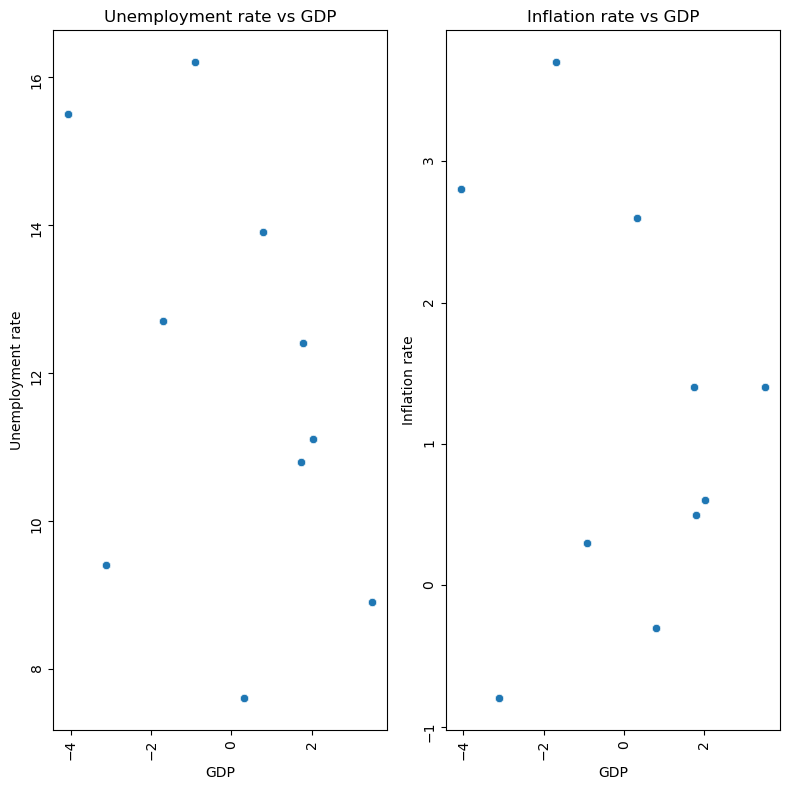

In [10]:
scatter_col = ['Unemployment rate','Inflation rate']
n_rows = (len(scatter_col)+3)//4
fig,ax = plt.subplots(n_rows,2,figsize=(8,8))
ax = ax.flatten()
for i, colname in enumerate(scatter_col):
    sns.scatterplot(numeric_data,x='GDP',y=colname,ax=ax[i])
    ax[i].set_title(f"{colname} vs GDP")
    ax[i].tick_params(rotation=90)

# hide empty rows
for j in range(i+1,len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

### Boxplot

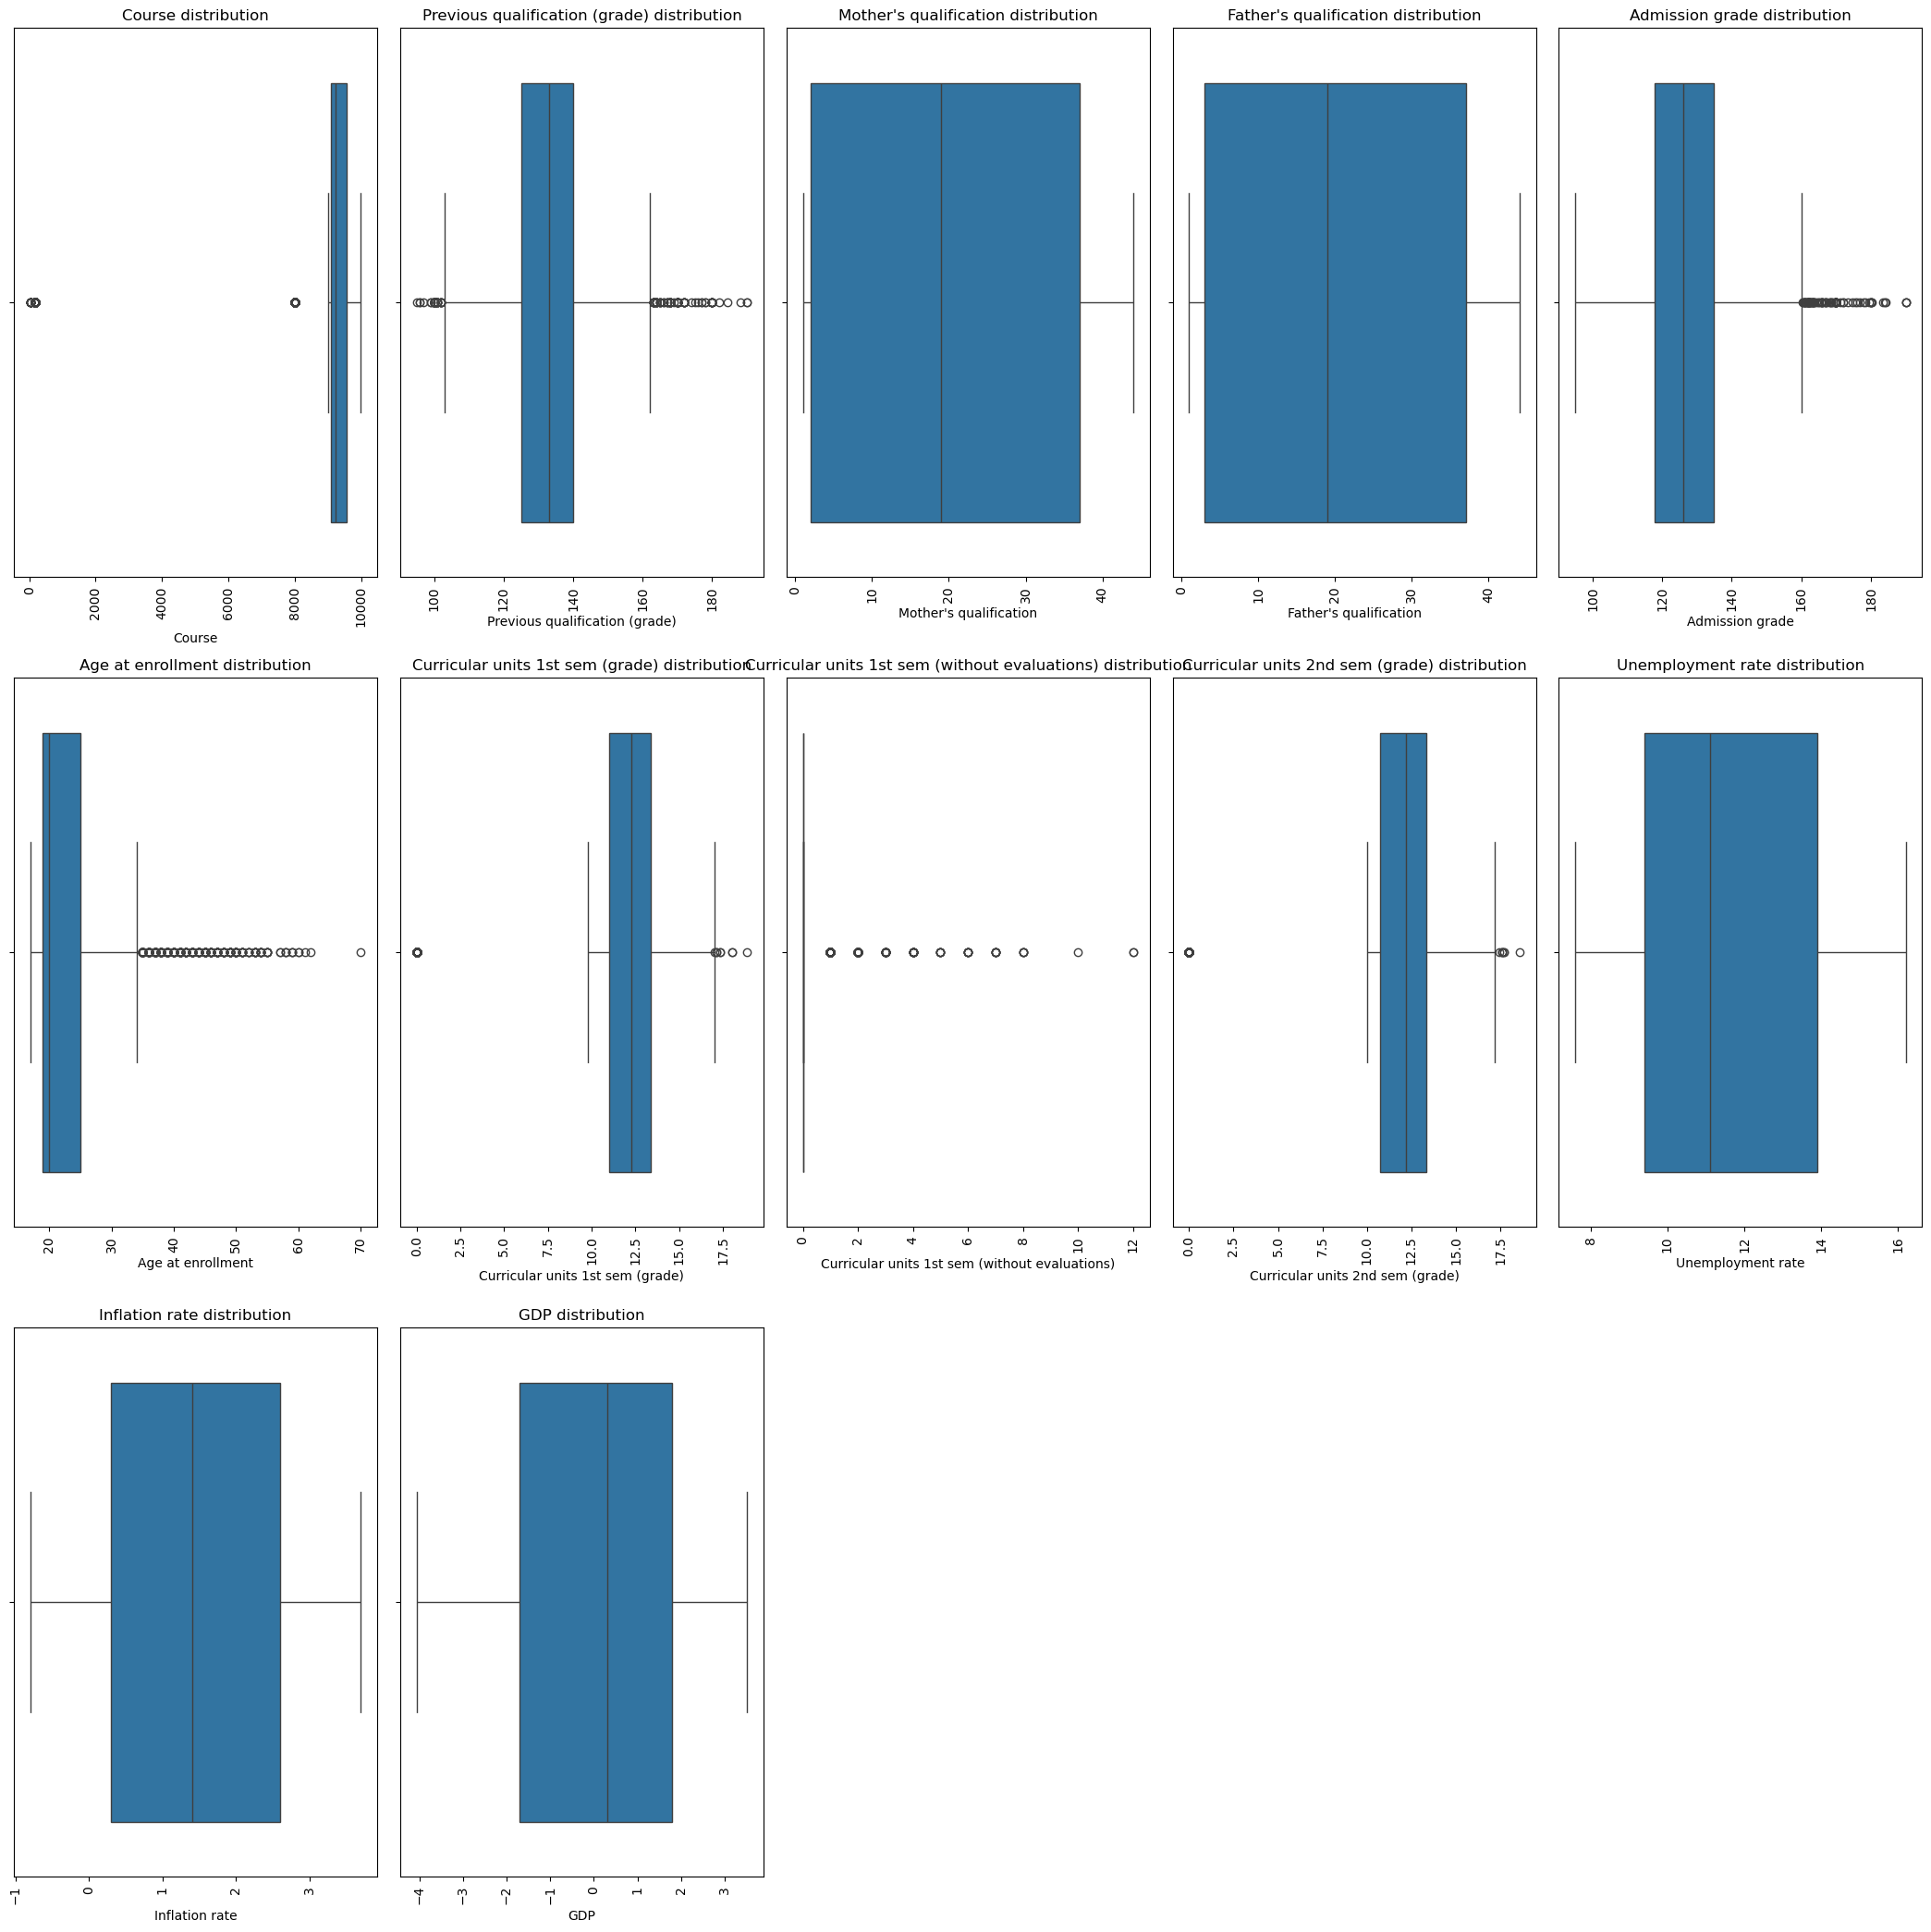

In [11]:
n_rows = (len(column_name)+3)//4
fig,ax = plt.subplots(n_rows,5,figsize=(21,21))
ax = ax.flatten()
for i, colname in enumerate(column_name):
    sns.boxplot(numeric_data,x=colname,ax=ax[i])
    ax[i].set_title(f"{colname} distribution")
    ax[i].tick_params(rotation=90)

# hide empty rows
for j in range(i+1,len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

### Boxplot numerical variables grouped by categorical variables

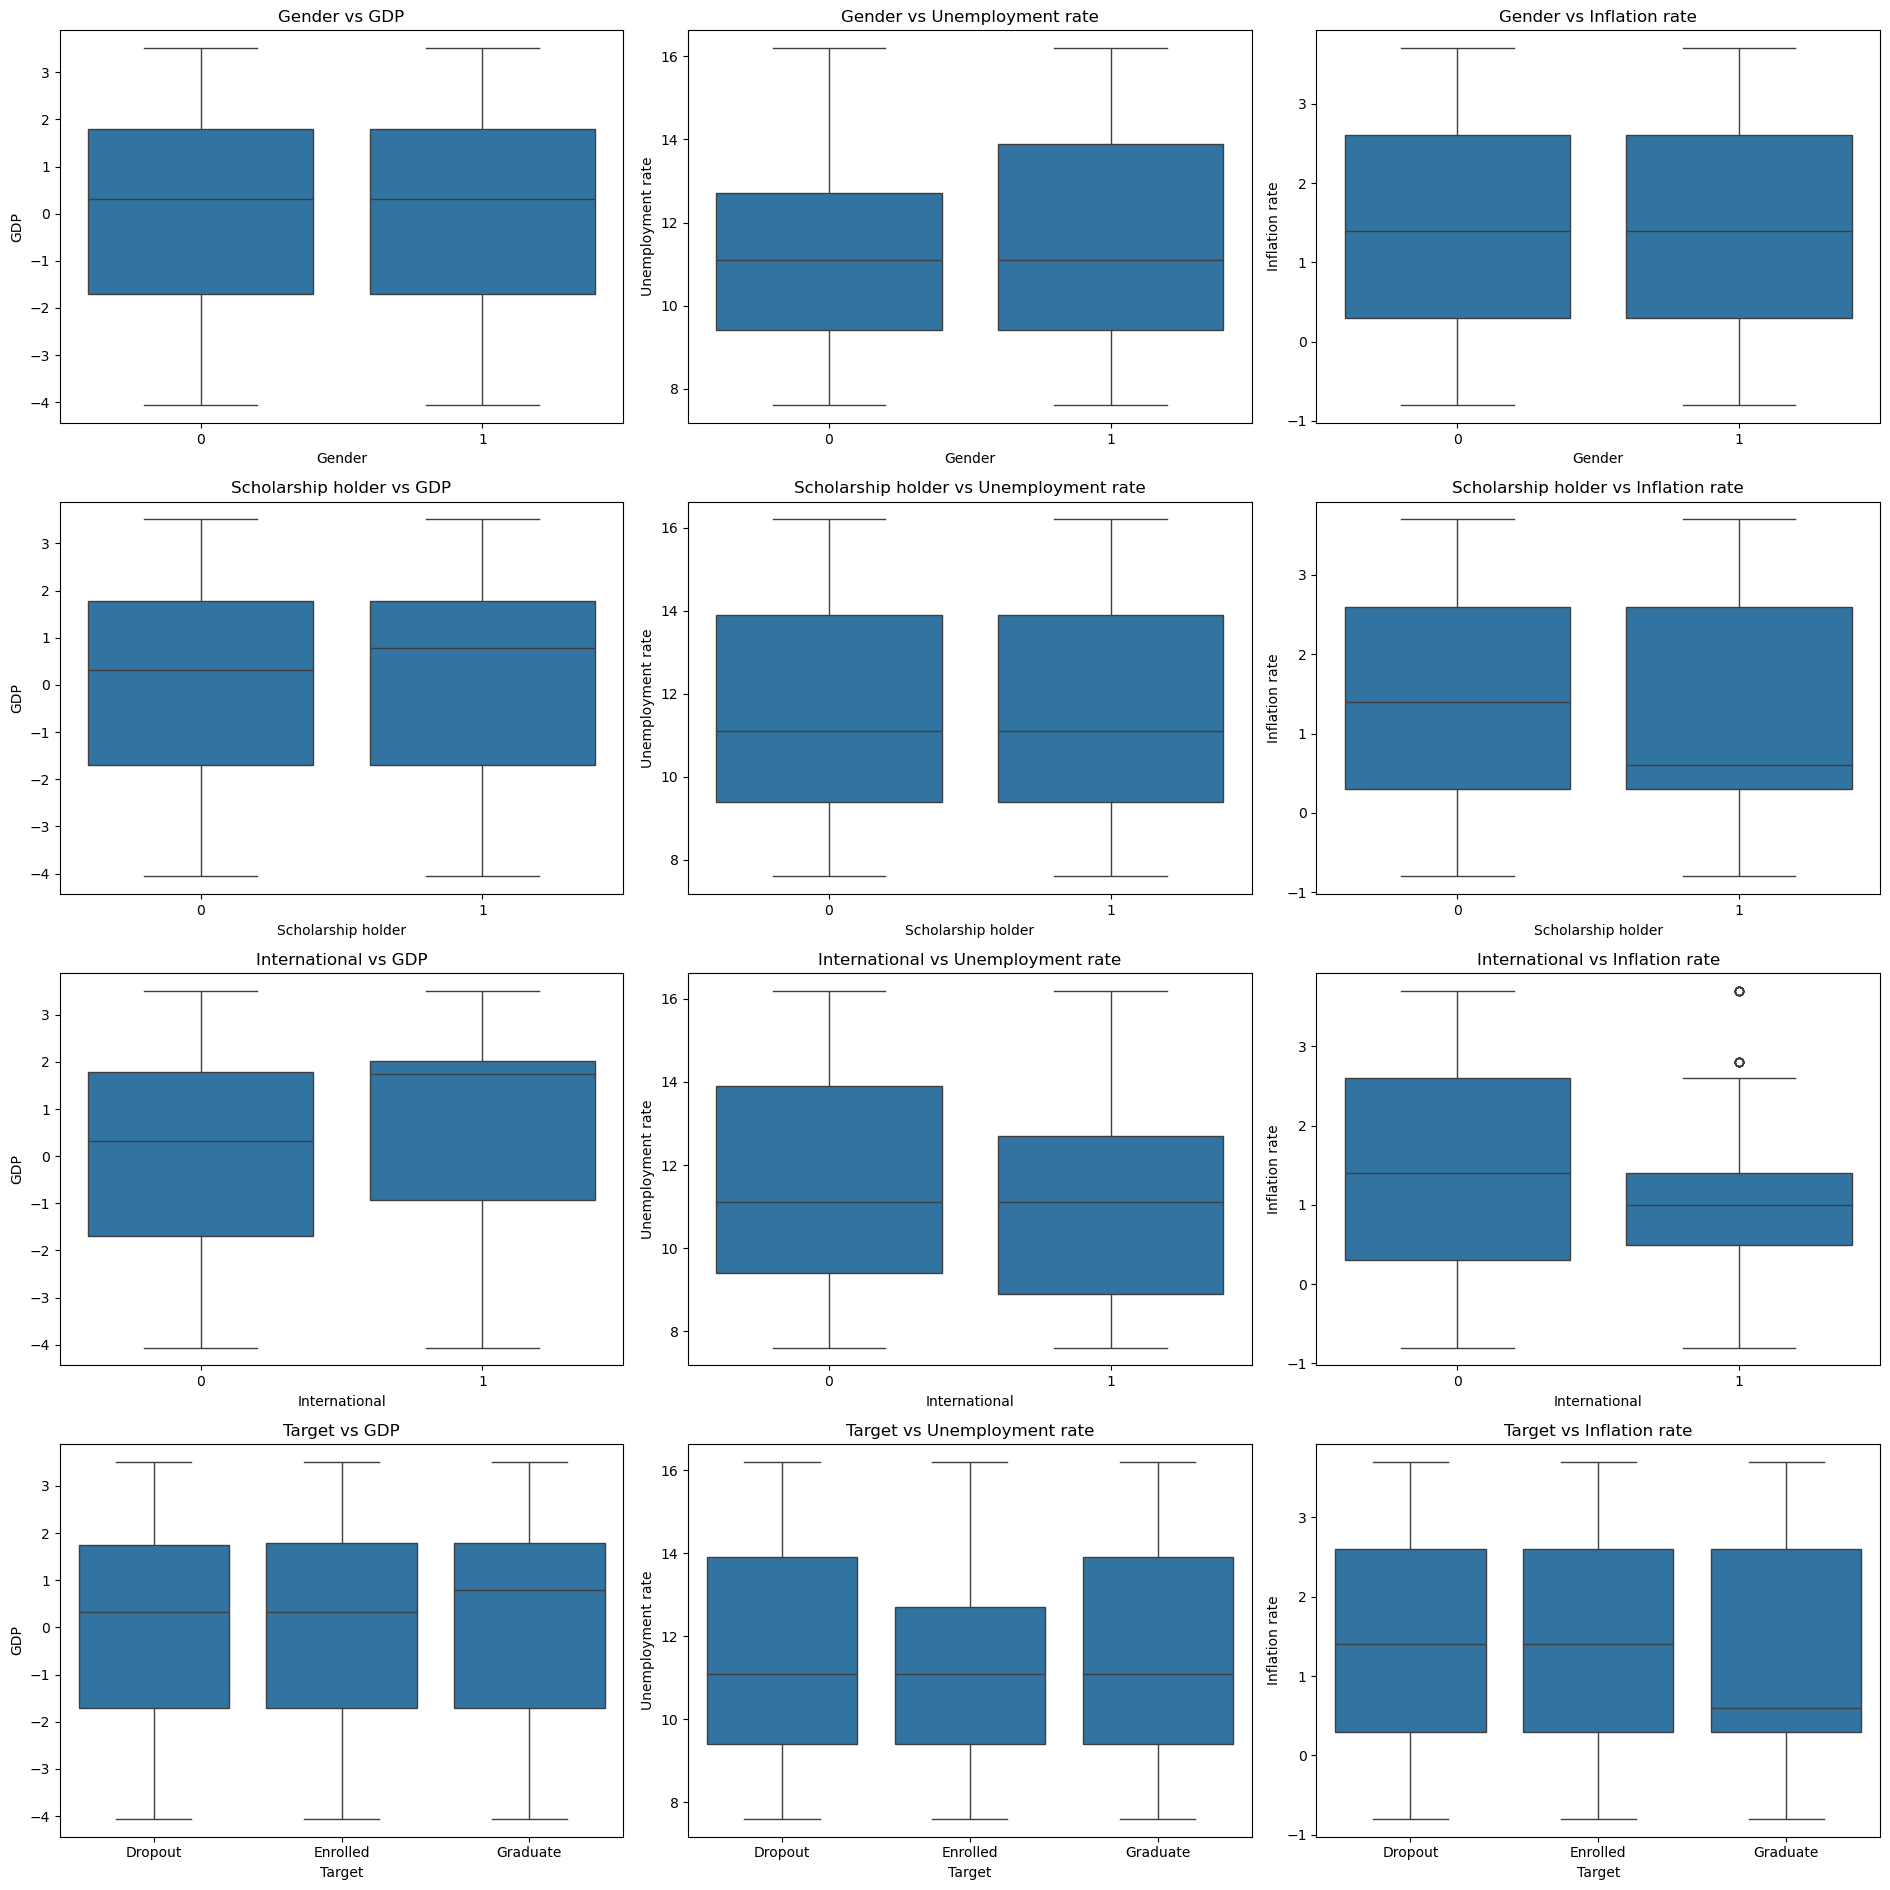

In [12]:
y_axis = ['GDP','Unemployment rate','Inflation rate']
x_axis=['Gender','Scholarship holder','International','Target']
fig,ax = plt.subplots(nrows=len(x_axis),ncols=len(y_axis),figsize=(19,19))
for i,x_name in enumerate(x_axis):
    for j,y_name in enumerate(y_axis):
        sns.boxplot(data,x=x_name,y=y_name,ax=ax[i,j])
        ax[i,j].set_title(f'{x_name} vs {y_name}')

plt.savefig('boxplot.png')
plt.tight_layout()
plt.show()
 

### correlation analysis for numeric data

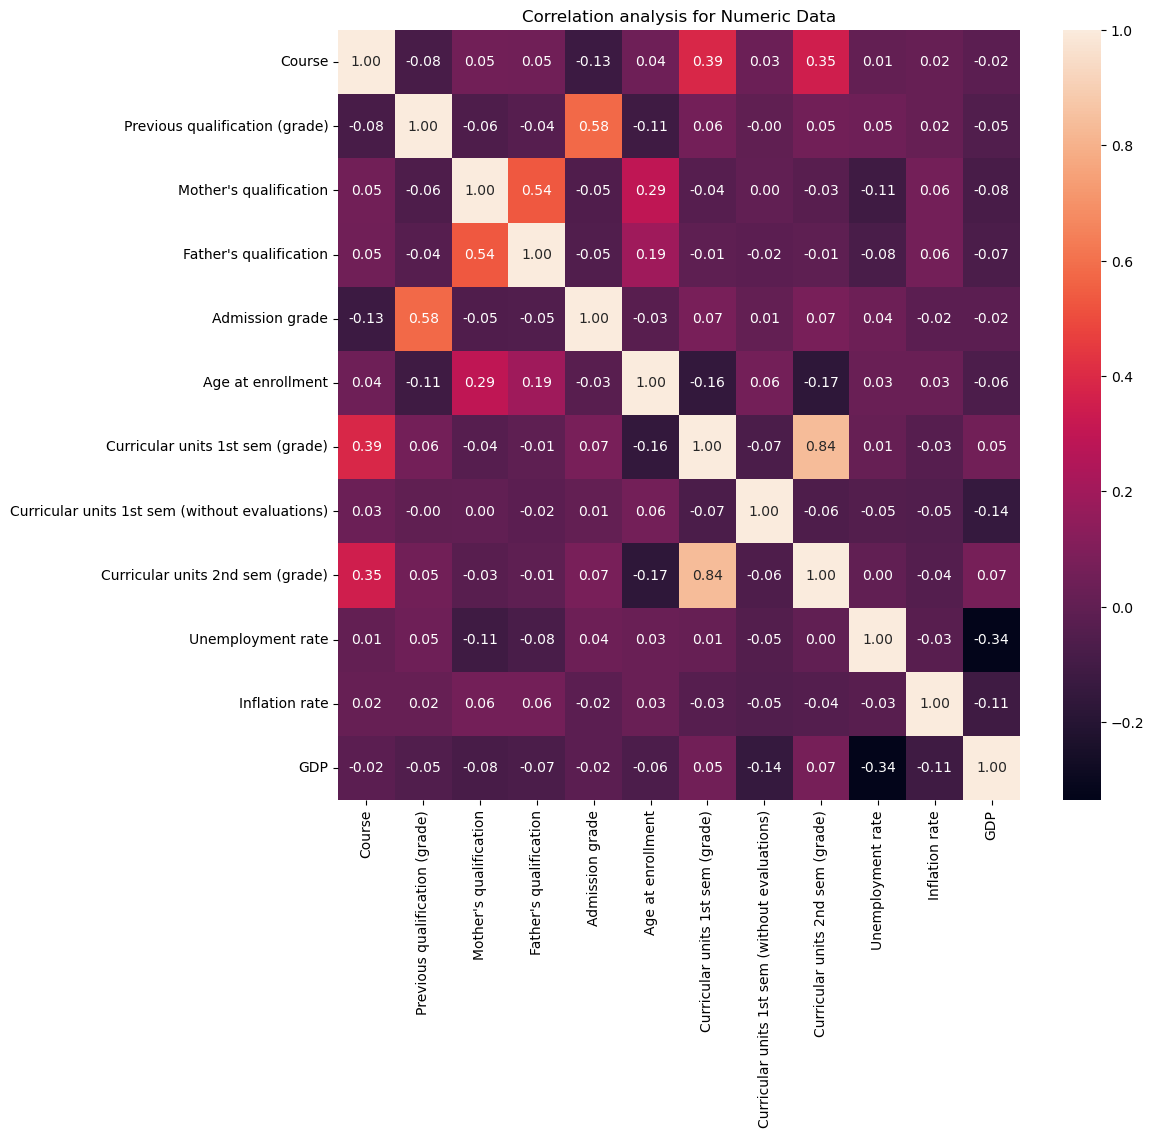

In [13]:
fig,ax = plt.subplots(figsize=(11,10))
#plt.figure(figsize=(11,10))
corr_analysis = numeric_data.corr()
sns.heatmap(corr_analysis,fmt='.2f',annot=True,ax=ax)
ax.set_title('Correlation analysis for Numeric Data')
plt.show()

### correlation analysis for Categorical data using Chi square

1. Null Hypothesis(H0): catgeorical variables are independent(no association)
2. alternative Hypothesis(H1): categorical variables are dependent(there is an association)

Explanation:
1. Chi-Square Value: A higher value indicates a greater difference between the observed and expected frequencies.
2. p-value: This helps determine the statistical significance. If the p-value is less than 0.05, you reject the null hypothesis and conclude that the variables are dependent.
3. Expected Frequencies: These are the frequencies we would expect if there were no association between the variables

In [14]:
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic


In [23]:

def chisquare_test(data,var1,var2):
    # create a contingency table:
  
        contingency_table = pd.crosstab(data[var1],data[var2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square test between {var1} and {var2}")
        print(f"Chi-Square value: {chi2}")
        print(f"p-value: {p}")
        print(f"Degrees of Freedom: {dof}")
        print("Expected frequencies table:")
        print(expected)
        print("\n")
        if p < 0.05:
            print(f"The variables {var1} and {var2} are **dependent** (reject H₀).\n")
        else:
            print(f"The variables {var1} and {var2} are **independent** (fail to reject H₀).\n")

    

In [24]:
# Perform Chi-Square tests for each pair of categorical variables
for i in range(len(categorical_column)):
    for j in range(i+1, len(categorical_column)):
        chisquare_test(data, categorical_column[i], categorical_column[j])

Chi-Square test between Marital status and Application mode
Chi-Square value: 1193.4874100633854
p-value: 5.360216518568887e-195
Degrees of Freedom: 85
Expected frequencies table:
[[1.51303165e+03 2.65754973e+00 1.41735986e+01 1.23133137e+02
  8.85849910e+00 2.65754973e+01 3.36622966e+01 7.72461121e+02
  1.09845389e+02 8.85849910e-01 8.85849910e-01 6.95392179e+02
  6.82104430e+01 2.76385172e+02 1.88686031e+02 5.22651447e+01
  3.10047468e+01 8.85849910e-01]
 [1.46322785e+02 2.57007233e-01 1.37070524e+00 1.19080018e+01
  8.56690778e-01 2.57007233e+00 3.25542495e+00 7.47034358e+01
  1.06229656e+01 8.56690778e-02 8.56690778e-02 6.72502260e+01
  6.59651899e+00 2.67287523e+01 1.82475136e+01 5.05447559e+00
  2.99841772e+00 8.56690778e-02]
 [1.54430380e+00 2.71247740e-03 1.44665461e-02 1.25678119e-01
  9.04159132e-03 2.71247740e-02 3.43580470e-02 7.88426763e-01
  1.12115732e-01 9.04159132e-04 9.04159132e-04 7.09764919e-01
  6.96202532e-02 2.82097649e-01 1.92585895e-01 5.33453888e-02
  3.164556

# Multivariate Analysis


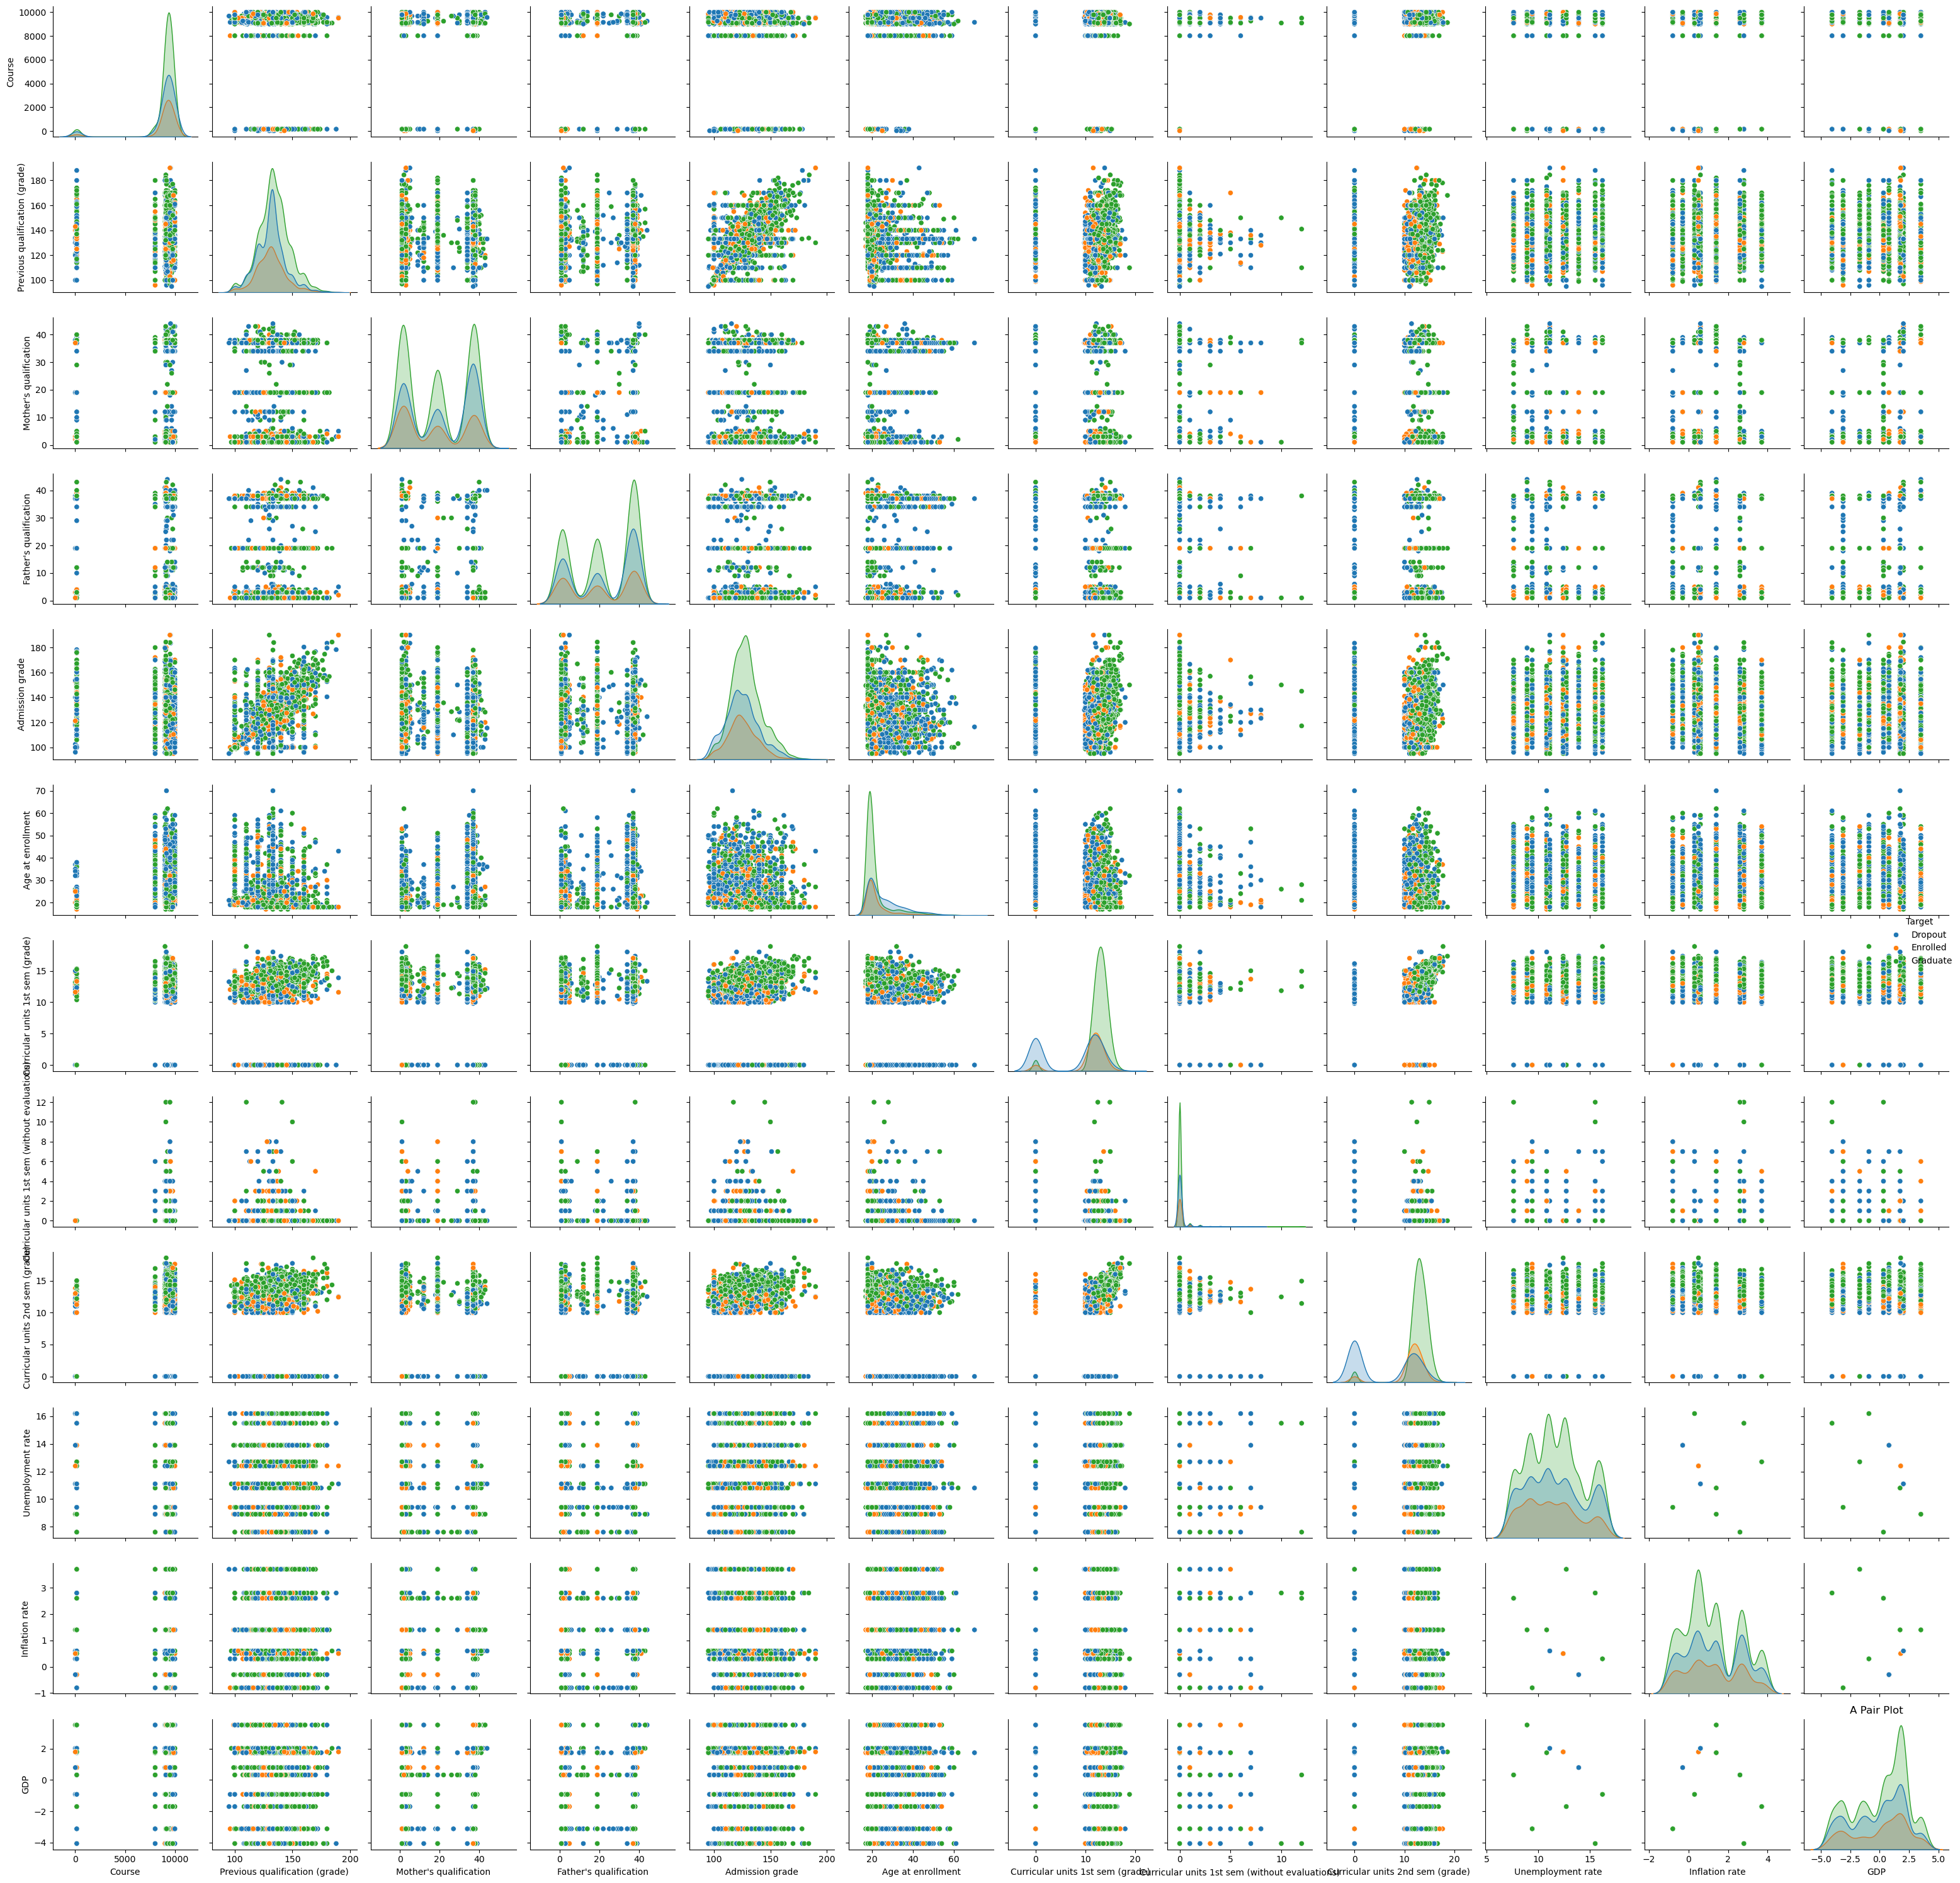

In [30]:
sns.pairplot(data,hue='Target',diag_kind='kde')
plt.title('A Pair Plot')
plt.tight_layout()
plt.show()

# Perform and visualize principal component analysis (PCA)

In [34]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
data_ = data.copy()

In [45]:
mapping = {'Graduate':2,'Dropout':1,'Enrolled':0}

data_['Target'] = data['Target'].map(mapping)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_)

pca = PCA(n_components = 2)
pca_components = pca.fit_transform(scaled_data)

# pca into a dataframe
pca_df = pd.DataFrame(data=pca_components,columns=['PCA1','PCA2'])


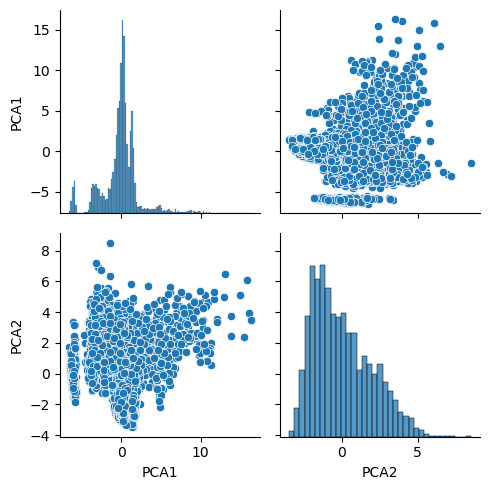

In [49]:
# Pair plot for pca_components
sns.pairplot(pca_df)
plt.savefig('PCA2.png')
plt.tight_layout()
plt.show()

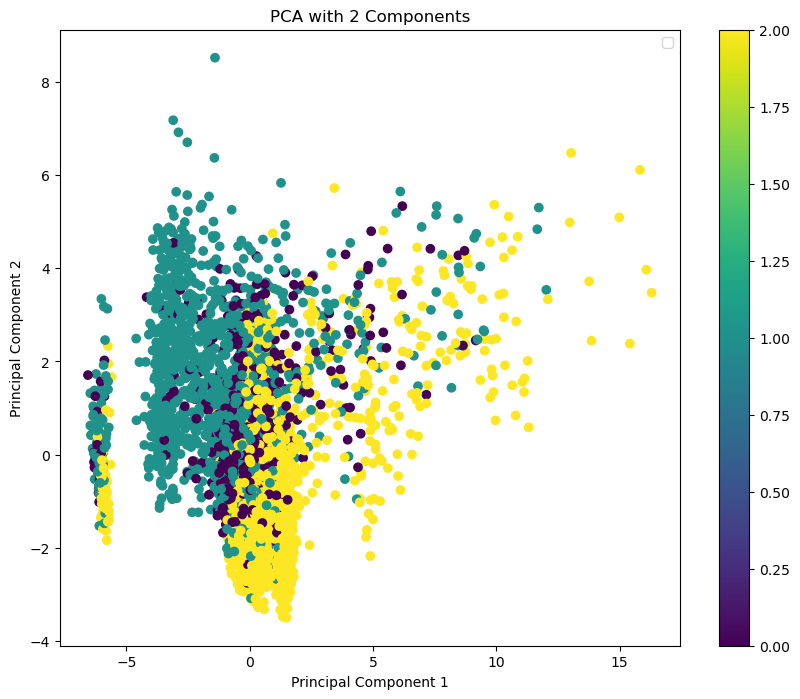

In [55]:
# Visualize PCA result in 2D

plt.figure(figsize=(10,8))

plt.scatter(pca_components[:,0],pca_components[:,1],c=data_['Target'],cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with 2 Components')
plt.legend()
plt.colorbar()
plt.show()

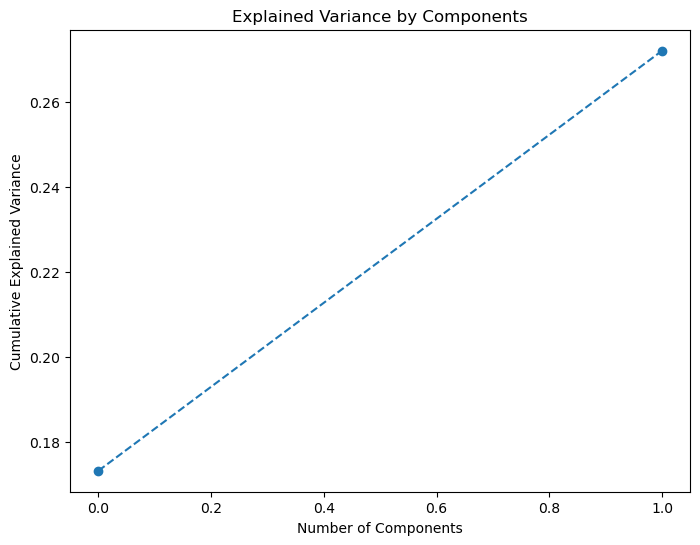

In [56]:
# Optional Step 5: Scree plot to visualize explained variance
import numpy as np
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

In [1]:
import pandas as pd
data=pd.read_csv('cleaned_data.csv')
mapping = {'1':'Male','0':'Female'}

data['Gender'] = data['Gender'].map(mapping)s